<a href="https://colab.research.google.com/github/kuzhuppillil/4jwFB7LZrh7Mn9TT/blob/main/Term_Deposit_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install catboost
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.6 MB/s eta 0:00:00


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool

from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate



import shap

import warnings
warnings.filterwarnings("ignore")



In [4]:
df = pd.read_csv("/content/drive/Othercomputers/My Laptop/Apziva Projects/Term Deposit Marketing/term-deposit-marketing-2020.csv")
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


In [5]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [6]:
len(df) - len(df.drop_duplicates())

0

In [7]:
df.nunique()

age            70
job            12
marital         3
education       4
default         2
balance      6849
housing         2
loan            2
contact         3
day            31
month          11
duration     1535
campaign       48
y               2
dtype: int64

**Observations:**



1.  No dupicates and null values.
2.  There are 40000 records with below attributes.
3.  Contains both binary and categorical attributes


**Attributes:**

    age : age of customer (numeric)
    job : type of job (categorical)
    marital : marital status (categorical)
    education (categorical)
    default: has credit in default? (binary)
    balance: average yearly balance, in euros (numeric)
    housing: has a housing loan? (binary)
    loan: has personal loan? (binary)
    contact: contact communication type (categorical)
    day: last contact day of the month (numeric)
    month: last contact month of year (categorical)
    duration: last contact duration, in seconds (numeric)
    campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    Output (desired target): y - has the client subscribed to a term deposit? (binary)


# EDA

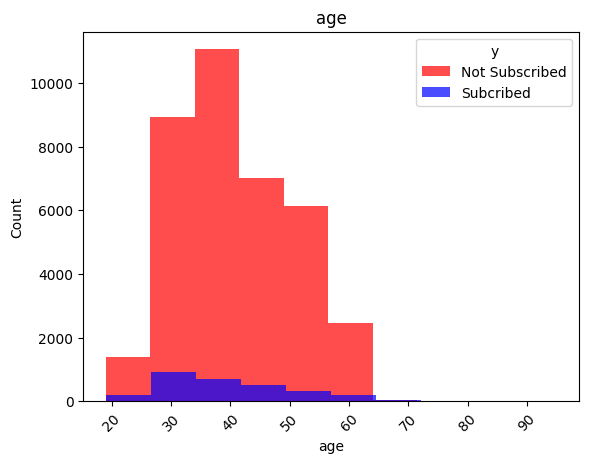

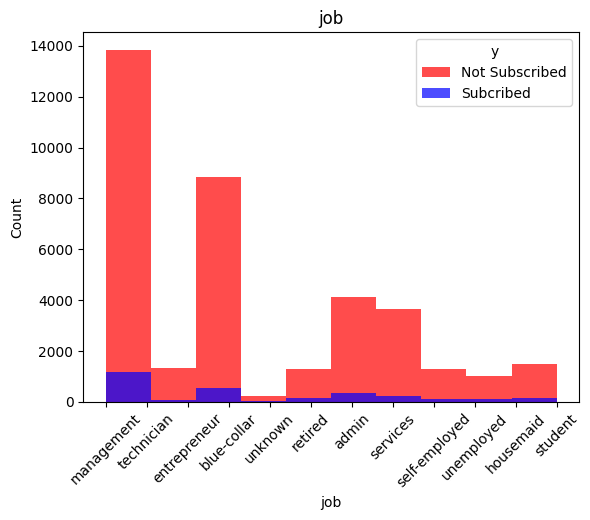

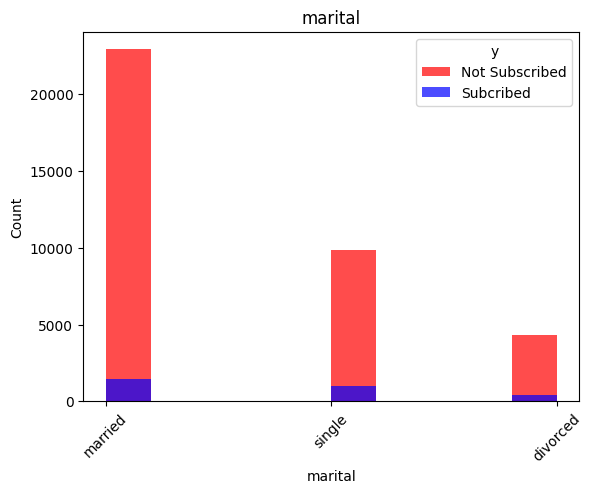

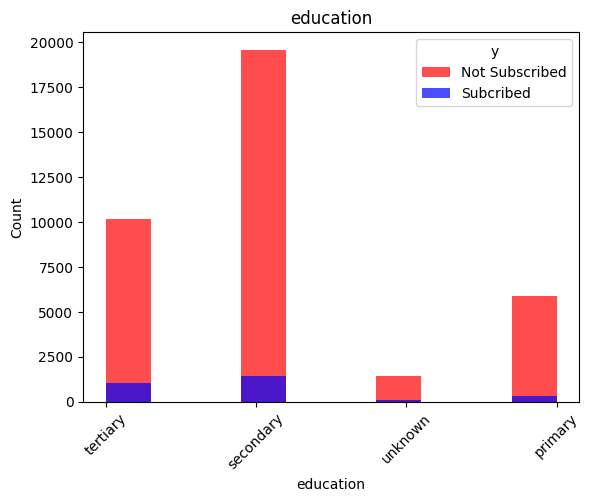

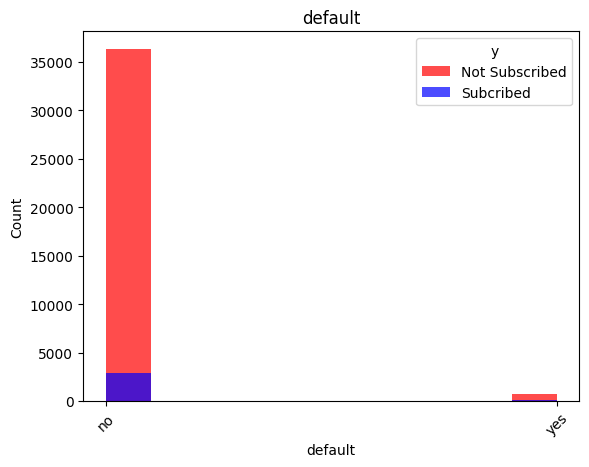

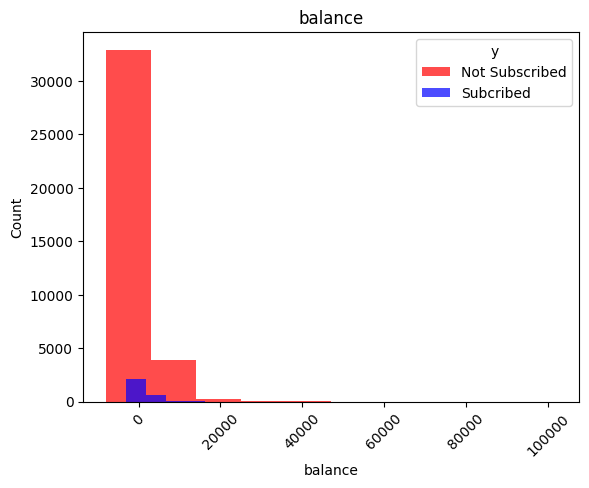

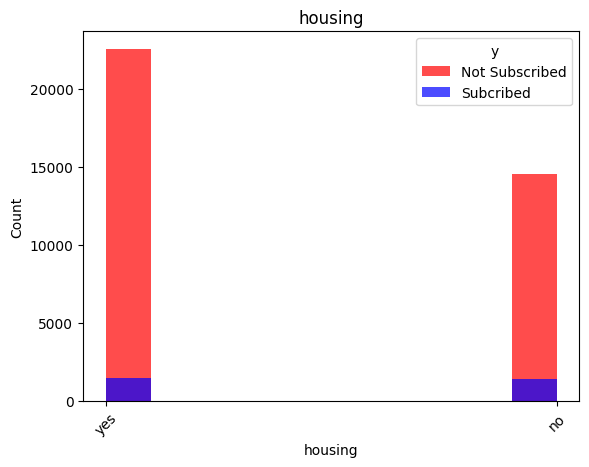

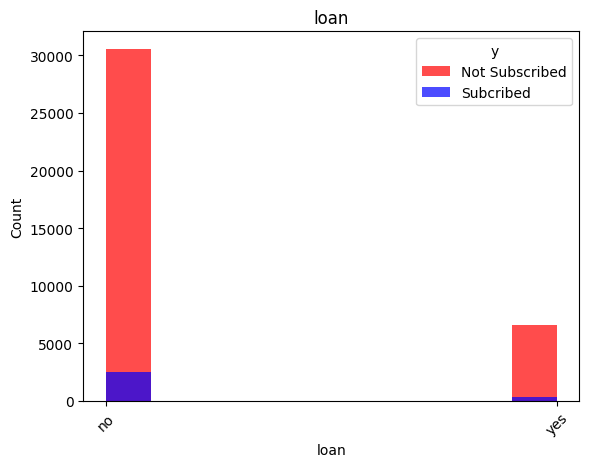

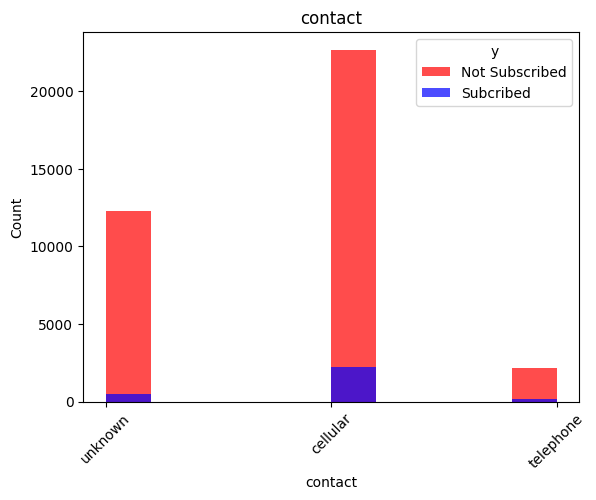

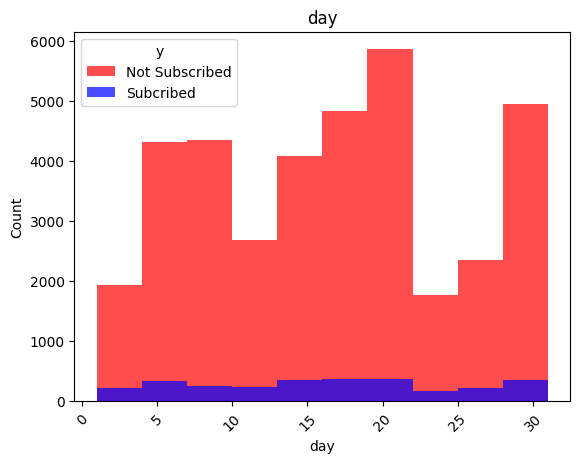

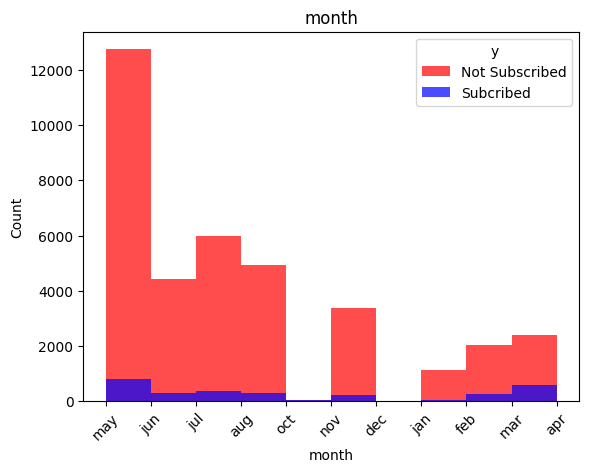

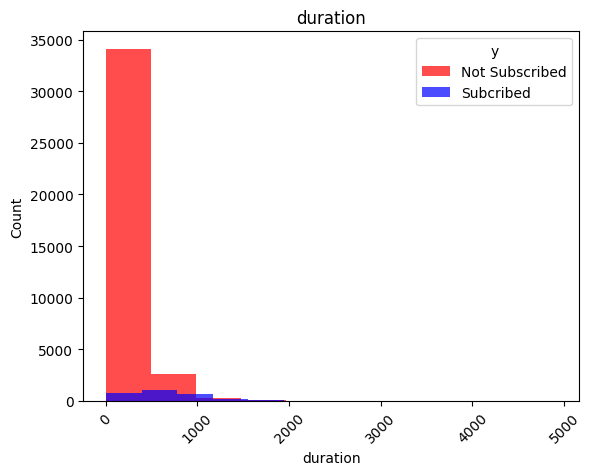

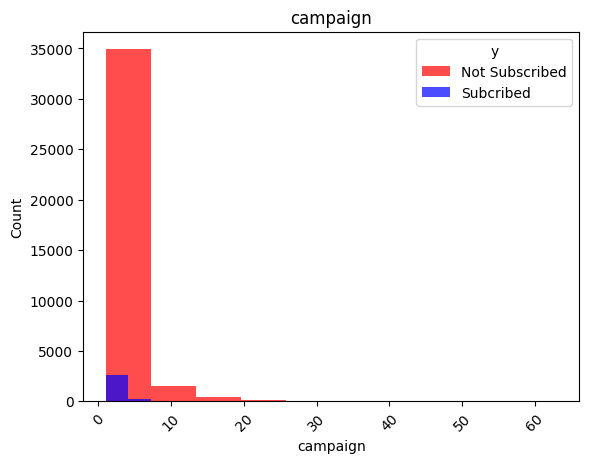

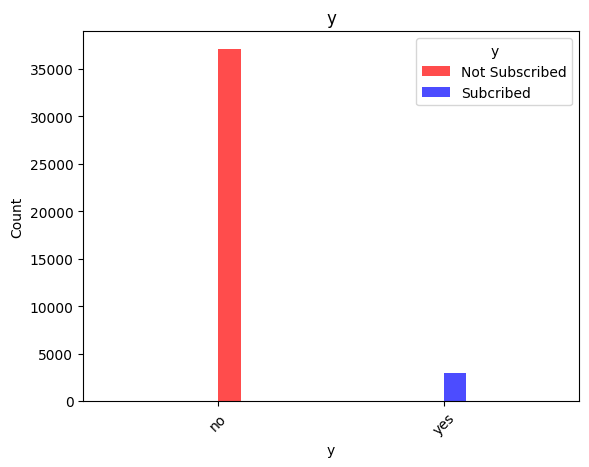

In [8]:

def hist(df):
  for feature in df.columns:
    plt.hist(df[df["y"]=="no"][feature], color='red', label ='Not Subscribed', alpha = 0.7, density = False)
    plt.hist(df[df["y"]=="yes"][feature], color='blue', label ='Subcribed', alpha = 0.7, density =False)
    plt.title(feature)
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.legend(title = 'y')
    plt.show()


hist(df)

**Histogram Observation:**

    1. The data exhibits a significant imbalance, with a predominant 'No' response, indicating that only a very small percentage of customers have subscribed to a term deposit.
    2. The majority of customers fall within the 30-50 age range.
    3. The job categories of Admin, Blue-collar, and Service encompass the largest portion of the customer base.
    4. Most customers are married.
    5. A majority of customers possess secondary education.
    6. The majority of customers do not have credit defaults.
    7. The majority of customers maintain a low average yearly balance, typically falling within the 0-10,000 euro range. (This distribution may benefit from finer granularity for further analysis.)
    8. A significant portion of customers have housing loans.
    9. The majority of customers do not have personal loans.
    10. The primary mode of contact with customers is via cellular phones.
    11. The most common last contact day falls within the 16-22nd range of each month. (Consider using a bin size of 5 for a revised analysis.)
    12. The majority of customers were contacted in May.
    13. A more detailed analysis is required when examining duration.
    14. The majority of customers were contacted between 1-8 times. (This analysis may benefit from finer granularity.)

**Note: Campaign, Duration, Balance required further analysis to understand their distribution.**





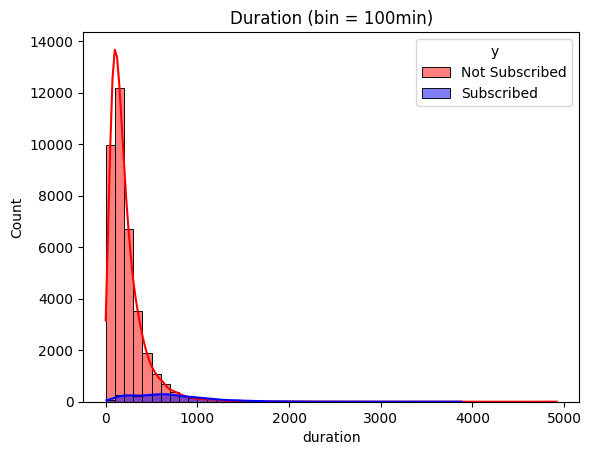

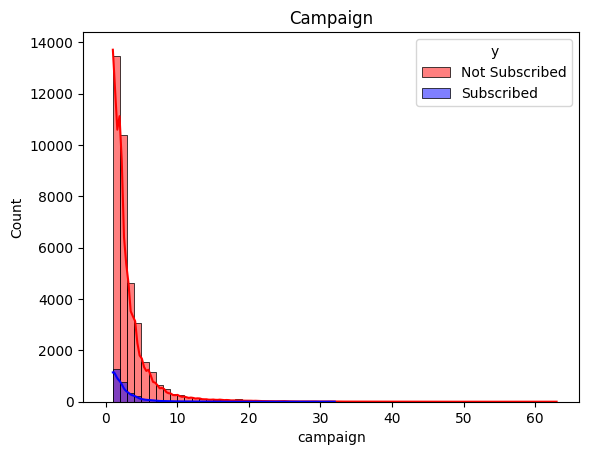

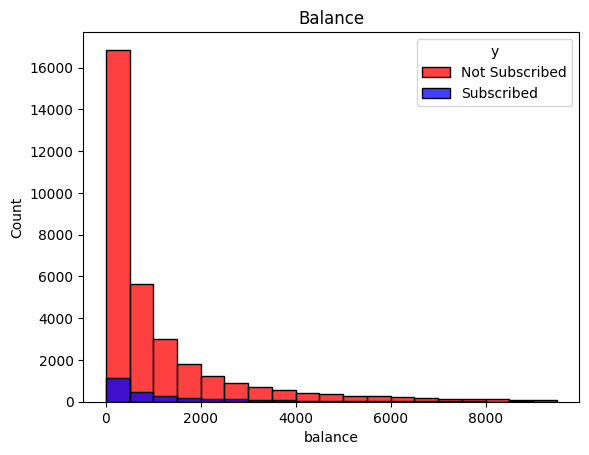

In [9]:
#Custom bin size for further distribution analysis

sns.histplot(data=df[df["y"]=="no"], x="duration", color='red', label ='Not Subscribed', bins = list(range(0, 2000,100 )), kde = True)
sns.histplot(data=df[df["y"]=="yes"], x="duration", color='blue', label ='Subscribed', bins = list(range(0, 2000,100 )), kde = True)
plt.title('Duration (bin = 100min)')
plt.legend(title = 'y')
plt.show()

sns.histplot(data=df[df["y"]=="no"], x="campaign", color='red', label ='Not Subscribed', bins = list(range(0, 20,1 )), kde = True)
sns.histplot(data=df[df["y"]=="yes"], x="campaign", color='blue', label ='Subscribed', bins = list(range(0, 20,1 )), kde = True)
plt.title('Campaign')
plt.legend(title = 'y')
plt.show()

sns.histplot(data=df[df["y"]=="no"], x="balance", color='red', label ='Not Subscribed', bins = list(range(0, 10000, 500)))
sns.histplot(data=df[df["y"]=="yes"], x="balance", color='blue', label ='Subscribed', bins = list(range(0, 10000, 500)))
plt.title('Balance')
plt.legend(title = 'y')
plt.show()




**Histogram observation**

1. Majority of customers were engaed over call for a duration of more than 200 mins.
2. Majority of customers were called only 1-2 times.
3. Majority of customers keep low average annual balance.


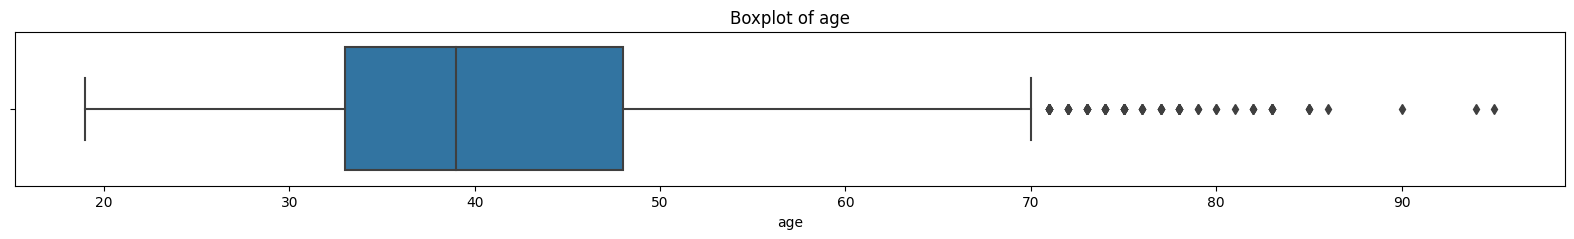

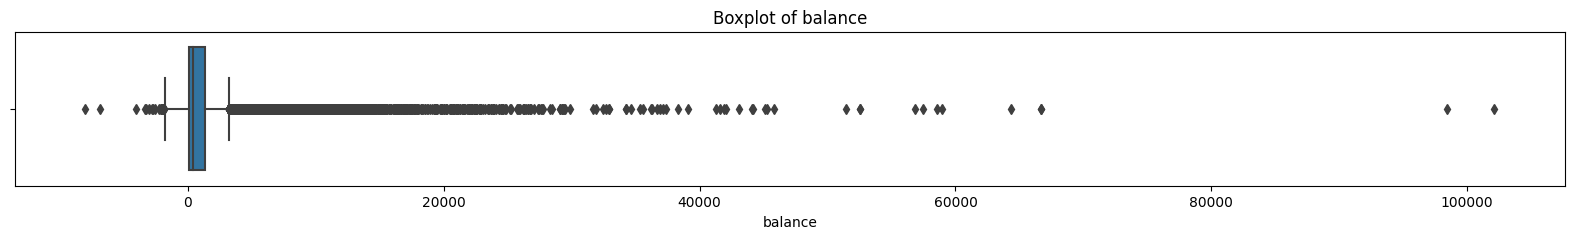

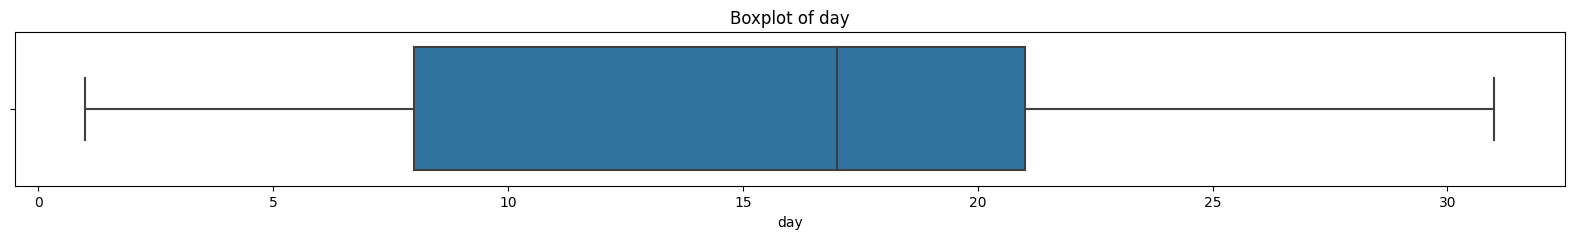

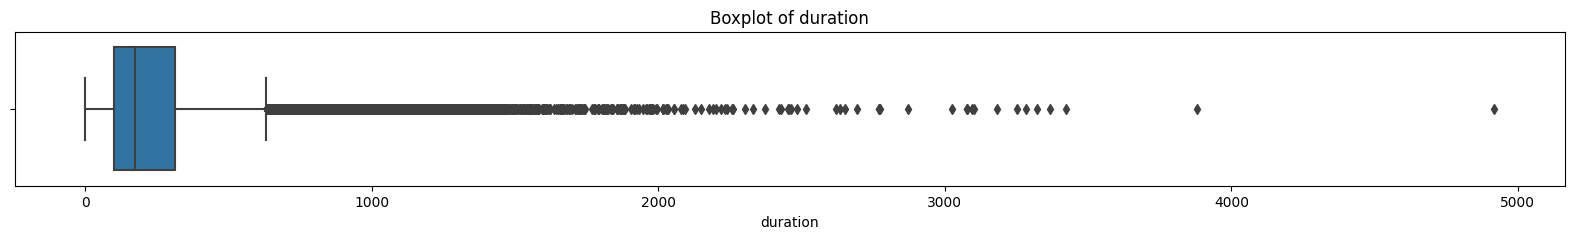

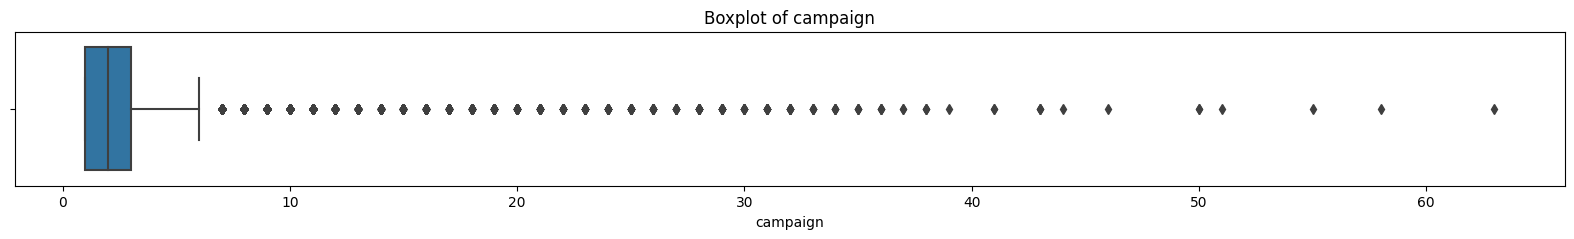


Column Name: age

Q1 = 33.0
Q3 = 48.0
IQR = 15.0
Lower Fence = 10.5
Upper Fence = 70.5
Count of Upper Outliers : 79
Count of Lower Outliers : 0

Column Name: balance

Q1 = 54.0
Q3 = 1319.0
IQR = 1265.0
Lower Fence = -1843.5
Upper Fence = 3216.5
Count of Upper Outliers : 4257
Count of Lower Outliers : 23

Column Name: day

Q1 = 8.0
Q3 = 21.0
IQR = 13.0
Lower Fence = -11.5
Upper Fence = 40.5
Count of Upper Outliers : 0
Count of Lower Outliers : 0

Column Name: duration

Q1 = 100.0
Q3 = 313.0
IQR = 213.0
Lower Fence = -219.5
Upper Fence = 632.5
Count of Upper Outliers : 3000
Count of Lower Outliers : 0

Column Name: campaign

Q1 = 1.0
Q3 = 3.0
IQR = 2.0
Lower Fence = -2.0
Upper Fence = 6.0
Count of Upper Outliers : 2992
Count of Lower Outliers : 0


In [10]:
numeric = ['age', 'balance','day','duration', 'campaign']

def box(numeric):
  for feat in df.columns:
    if feat in numeric:
      plt.figure(figsize = (20,2))
      sns.boxplot(x=df[feat])
      plt.title("Boxplot of " + feat)
      plt.show()


def outliers(col):
  Q1 = np.percentile(col, 25)
  Q3 = np.percentile(col, 75)
  IQR = Q3 - Q1
  print("\nColumn Name:", col.name)
  print("\nQ1 =",Q1)
  print("Q3 =",Q3)
  print("IQR =",IQR)
  upperf = Q3+1.5*IQR
  lowerf = Q1-1.5*IQR
  print("Lower Fence =",lowerf)
  print("Upper Fence =",upperf)
  upper_indices = np.where(col > upperf)
  lower_indices = np.where(col < lowerf)
  print("Count of Upper Outliers :",len(upper_indices[0]))
  print("Count of Lower Outliers :",len(lower_indices[0]))


box(numeric)

for col in numeric:
    outliers(df[col])


**Observation: **

*   There are few outliers, especially duration and balance contains too many outliers.
*   The outliers will not be removed considering the imabalanced class and outlier contibution to predictions.



In [11]:
# #normalizing data to reduce outliers

# def log_transform(x):
#     if x < 0:
#         return np.log1p(abs(x))
#     else:
#         return np.log1p(x)

# df['balance'] = df['balance'].apply(log_transform)
# df['duration'] = df['duration'].apply(log_transform)
# df['campaign'] = df['campaign'].apply(log_transform)



# numeric = ['balance','duration','campaign']
# box(numeric)

# for col in numeric:
#     outliers(df[col])

Observation:

Duration and balance is normalised with reduced outliers. However the normalization reduced the model accuracy, hence the step is skipped.

In [12]:
#Train test split for catbootclassifier
df_train,df_test= train_test_split(df,test_size=0.4,random_state=42)

In [13]:
df['y'] = df['y'].str.replace('yes','1').str.replace('no','0').astype(int)
df['default'] = df['default'].str.replace('yes','1').str.replace('no','0').astype(int)
df['housing'] = df['housing'].str.replace('yes','1').str.replace('no','0').astype(int)
df['loan'] = df['loan'].str.replace('yes','1').str.replace('no','0').astype(int)

# Onehot Encoding

In [14]:
#converting the categorical variables
df2 = df.copy()
df2 = pd.get_dummies(df2)

# Correlation of y:

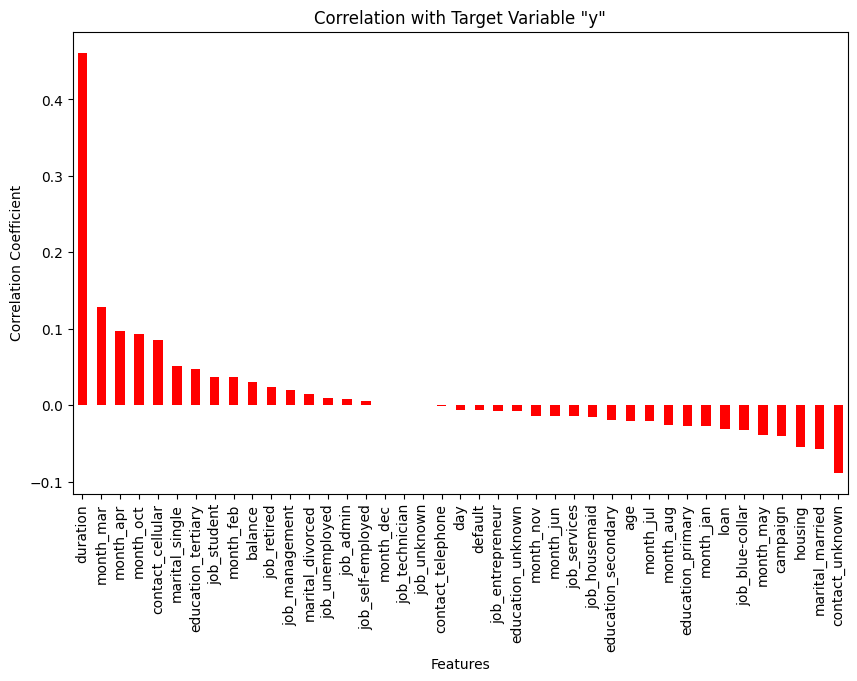

In [15]:
corr = df2.corr()['y'].sort_values(ascending = False)[1:]
plt.figure(figsize=(10, 6))
corr.plot(kind='bar', color='red')
plt.title('Correlation with Target Variable "y"')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

Duration has the highest positive correlation of 0.4



In [16]:
df2.info()
df2.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  40000 non-null  int64
 1   default              40000 non-null  int64
 2   balance              40000 non-null  int64
 3   housing              40000 non-null  int64
 4   loan                 40000 non-null  int64
 5   day                  40000 non-null  int64
 6   duration             40000 non-null  int64
 7   campaign             40000 non-null  int64
 8   y                    40000 non-null  int64
 9   job_admin            40000 non-null  uint8
 10  job_blue-collar      40000 non-null  uint8
 11  job_entrepreneur     40000 non-null  uint8
 12  job_housemaid        40000 non-null  uint8
 13  job_management       40000 non-null  uint8
 14  job_retired          40000 non-null  uint8
 15  job_self-employed    40000 non-null  uint8
 16  job_services         4

,age,default,balance,housing,loan,day,duration,campaign,y,job_admin,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
39995,53,0,395,0,0,3,107,1,0,0,...,0,0,0,0,0,1,0,0,0,0
39996,30,0,3340,0,0,3,238,3,1,0,...,0,0,0,0,0,1,0,0,0,0
39997,54,0,200,0,0,3,170,1,1,1,...,0,0,0,0,0,1,0,0,0,0
39998,34,0,1047,0,0,3,342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
39999,38,0,1442,1,0,3,113,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# Splitting and Preprocessing Data

In [17]:
train, temp = train_test_split(df2, test_size=0.4, random_state=100)
valid, test = train_test_split(temp, test_size=0.5, random_state=100)

In [18]:
print(len(train[train['y']==1]))

print(len(train[train['y']==0]))

1741
22259


In [19]:
def scale_dataset(data,oversample = False):
  X = data.drop('y',axis =1)
  y = data['y']

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  data = np.column_stack((X, y))

  return data, X, y

In [20]:
train_scaled, X_train, y_train = scale_dataset(train, oversample = True)

#Oversampling only the training dataset to address imbalanced classes
#For Validation and test dataset, standarizing the features
valid_scaled, X_valid, y_valid = scale_dataset(valid, oversample = False)
test_scaled, X_test, y_test = scale_dataset(test, oversample = False)

In [21]:
sum(y_train == 1)


22259

In [22]:
sum(y_train == 0)

22259

# Model Crossvalidation  (SKF with 5 Fold)

In [23]:
def cross_val(model,folds,rs):
  scoring = ['accuracy', 'precision', 'recall', 'f1']
  cv = StratifiedKFold(n_splits=5, shuffle=True)
  scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)

  accuracies = scores['test_accuracy']
  precisions = scores['test_precision']
  recalls = scores['test_recall']
  f1_scores = scores['test_f1']

  print("\nModel: ",model)
  print("Average Accuracy: ", accuracies.mean() * 100, "%")
  print("Average Precision: ", precisions.mean()* 100, "%")
  print("Average Recall: ", recalls.mean()* 100, "%")
  print("Average F1 Score: ", f1_scores.mean()* 100, "%")
  print("--------------------------------------------")

In [24]:

lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lgbm = LGBMClassifier(boosting_type= "dart", metric= "accuracy", verbose = -1)

models = [rf,lgbm,lr,knn,dt]

for i in models:
  cross_val(i,5,46)



Model:  RandomForestClassifier()
Average Accuracy:  98.30181059939314 %
Average Precision:  96.7170638975346 %
Average Recall:  100.0 %
Average F1 Score:  98.33066121341243 %
--------------------------------------------

Model:  LGBMClassifier(boosting_type='dart', metric='accuracy', verbose=-1)
Average Accuracy:  92.24134853036708 %
Average Precision:  88.53551382260531 %
Average Recall:  97.05288473087101 %
Average F1 Score:  92.59808889528875 %
--------------------------------------------

Model:  LogisticRegression()
Average Accuracy:  86.67954531211353 %
Average Precision:  86.70350859322878 %
Average Recall:  86.64807750885502 %
Average F1 Score:  86.67530305644348 %
--------------------------------------------

Model:  KNeighborsClassifier()
Average Accuracy:  94.78413673616582 %
Average Precision:  90.60370687353074 %
Average Recall:  99.93260950879123 %
Average F1 Score:  95.03964273938038 %
--------------------------------------------

Model:  DecisionTreeClassifier()
Averag

# Model Evaluation on different datasets

In [25]:
#fitting all models using training dataset

def model_fitting(models,X,y):
  for model in models:
    model.fit(X, y)

model_fitting(models,X_train,y_train)

#function for model evaluation
def model_ex(models,X,y):
  for model in models:
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("\nAccuracy of ",model," :", accuracy*100,"%")
    print("Classification Report: \n", classification_report(y,y_pred))
    print("-----------------------------------------------------------")

In [26]:
#Model evaluation on validation dataset

model_ex(models,X_valid,y_valid)



Accuracy of  RandomForestClassifier()  : 93.72500000000001 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      7413
           1       0.60      0.45      0.51       587

    accuracy                           0.94      8000
   macro avg       0.78      0.71      0.74      8000
weighted avg       0.93      0.94      0.93      8000

-----------------------------------------------------------

Accuracy of  LGBMClassifier(boosting_type='dart', metric='accuracy', verbose=-1)  : 87.4375 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      7413
           1       0.36      0.92      0.52       587

    accuracy                           0.87      8000
   macro avg       0.68      0.90      0.72      8000
weighted avg       0.95      0.87      0.90      8000

-----------------------------------------------------------

Accuracy of  Logis

# Final Model Evaluation on test dataset:

In [27]:
#Model evaluation on the selected model using test dataset

model = [rf]
model_ex(model,X_test,y_test)


Accuracy of  RandomForestClassifier()  : 93.1125 %
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      7432
           1       0.52      0.40      0.45       568

    accuracy                           0.93      8000
   macro avg       0.74      0.69      0.71      8000
weighted avg       0.92      0.93      0.93      8000

-----------------------------------------------------------


**Observation:**


*   We've attained a success metric of over 81% accuracy across all our models, with the RandomForestClassifier leading the way at an impressive 93% accuracy on the test dataset and 93.6% on the validation dataset.
*   Using a 5-fold Stratified K-Fold (SKF) cross-validation, we've achieved an average accuracy score of 98.3 on our training dataset.
*   It's worth noting that while accuracy is a valuable measure of model performance, it may not be the most comprehensive metric. Nevertheless, for our purposes, we've chosen accuracy as our primary success indicator.
*   Importantly, our classes were significantly imbalanced, prompting us to implement a random oversampler on the training dataset to balance the class distribution when training our models.



# Feature Importance


                feature  importance
6              duration    0.462263
2               balance    0.076209
5                   day    0.075344
0                   age    0.063747
7              campaign    0.034652
30            month_apr    0.022184
3               housing    0.020005
29      contact_unknown    0.019979
37            month_mar    0.019807
27     contact_cellular    0.016123
33            month_feb    0.015076
35            month_jul    0.011782
38            month_may    0.010294
40            month_oct    0.009490
4                  loan    0.008861
31            month_aug    0.008551
36            month_jun    0.008479
39            month_nov    0.008110
24  education_secondary    0.008069
9       job_blue-collar    0.007979
21      marital_married    0.007859
25   education_tertiary    0.007784
17       job_technician    0.007665
12       job_management    0.007491
22       marital_single    0.007071
8             job_admin    0.006453
23    education_primary    0

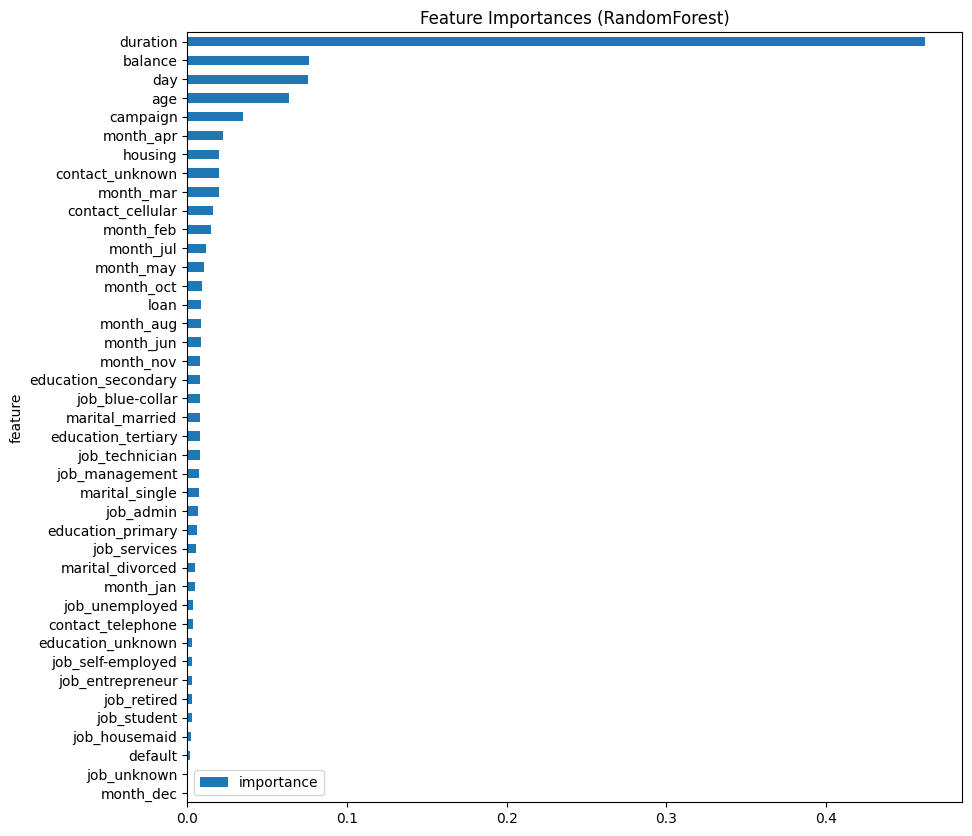

In [28]:
#Selecting RF classifier for feature importance as it offered the best accurancy

importances = rf.feature_importances_
feature_df = pd.DataFrame({'feature':df2.drop(['y'], 1).columns, 'importance':importances})

feature_df.sort_values('importance').plot.barh(y='importance', x='feature', figsize=(10,10))
plt.title('Feature Importances (RandomForest)')

print(feature_df.sort_values('importance', ascending=False))

**What makes the customers buy? Tell us which feature we should be focusing more on?**



*   Based on the insights provided by the plot and table above, it is evident that "Duration" stands out as a crucial feature for predicting customer outcomes. Following closely in importance are "Balance," "Day," and "Age."
*   When prioritizing the focus on these features, it is advisable to start with "Duration" - the duration of calls made to the customer. Subsequently, "Balance," representing the average yearly balance, should receive attention. Additionally, the day of the month on which the customer is contacted and the customer's age are also significant and warrant focus in that order.


In [32]:
explainer = shap.Explainer(rf, X_test)
#shap_values = explainer.shap_values(X_test)
expected_value = explainer.expected_value

100%|===================| 1132/1136 [01:43<00:00]       

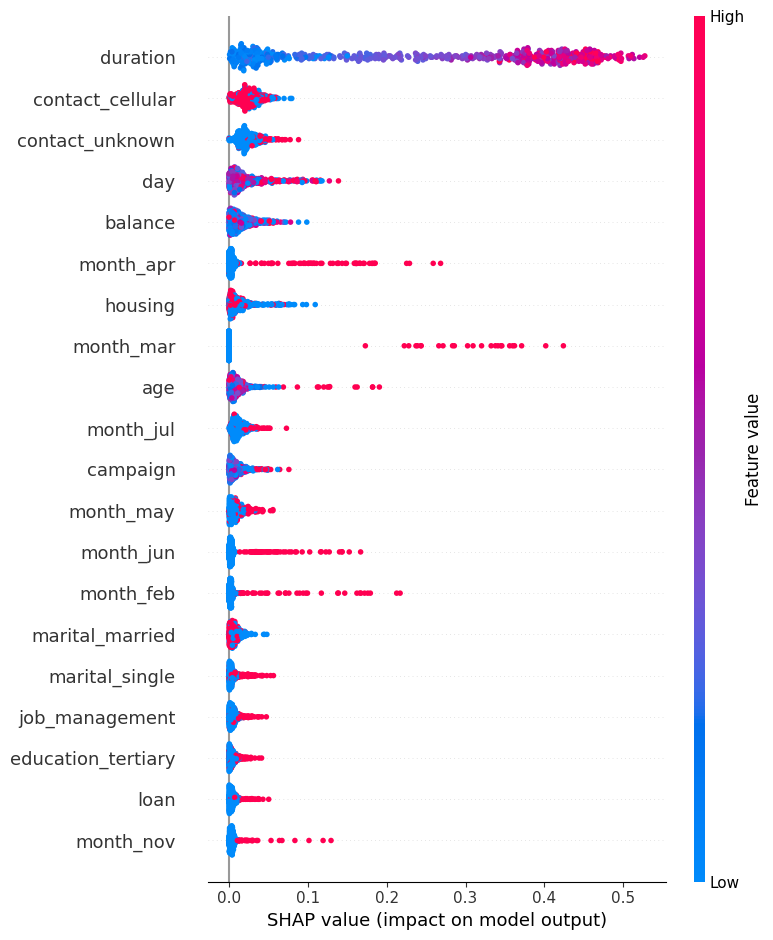

In [31]:
feature_names = train.drop('y', axis=1).columns
X_positive = X_test[y_test == 1]
shap_values_positive = explainer.shap_values(X_positive)
shap_values_mean = np.abs(shap_values_positive).mean(0)
shap.summary_plot(shap_values_mean, X_positive, feature_names=feature_names)
shap.initjs()

**Observations**
Expanding on the previous explaination about feature importance, SHAP values provide more detailed insights into the factors that influence a customer's decision to subscribe to a term deposit.


*   **Positive Contributing Features:** The SHAP plot displayed here focuses exclusively on the features that have a positive impact on predicting the customer's outcome. These are the factors that lead to higher chances of a customer subscribing to a term deposit.
*   **Duration of Calls:** Similar to the previous analysis, this SHAP value plot reaffirms that the duration of calls is a critical factor in achieving a positive customer outcome. It's noteworthy that longer call durations contribute even more significantly to the likelihood of a positive customer outcome, as indicated by the prominent red highlights.
*   **Contact with Unknown Parties:** Another key feature insight is that the "contact_unknown" feature is the second most important factor influencing a positive model output. This suggests that communicating with unknown contacts is associated with an increased likelihood of customer subscriptions. In other words, reaching out to new or previously uncontacted customers appears to be beneficial for achieving positive outcomes.

Note: It's important to note that the observations from the SHAP values are limited due to the data used for generating them. The SHAP values were computed based on the test data split, and the analysis focused exclusively on positive outcomes. Therefore, these insights provide valuable information, but they should be interpreted within the context of the specific dataset and analysis conducted.





# **Catboost Tryout**

In [33]:
#trying catboost

categorical_features_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact','day', 'month', 'duration','campaign']

train_pool = Pool(df_train.drop(['y'], 1), label=df_train.y, cat_features=categorical_features_names)
test_pool = Pool(df_test.drop(['y'], 1), label=df_test.y, cat_features=categorical_features_names)

cat_model = CatBoostClassifier(iterations=1000,
                               depth=7,
                               learning_rate=0.1,
                               bagging_temperature = 0.5,
                               verbose = 0)

cat_model.fit(train_pool)

y_pred_cat = cat_model.predict(test_pool)

print("accuracy of the catboost: ",accuracy_score(test_pool.get_label(),y_pred_cat))
print("\nClassification Report: \n", classification_report(test_pool.get_label(),y_pred_cat))


accuracy of the catboost:  0.9345625

Classification Report: 
               precision    recall  f1-score   support

          no       0.95      0.98      0.97     14841
         yes       0.58      0.35      0.43      1159

    accuracy                           0.93     16000
   macro avg       0.77      0.66      0.70     16000
weighted avg       0.92      0.93      0.93     16000



      feature  importance
11   duration   26.634624
9         day   12.401781
10      month   10.768430
0         age    9.191178
8     contact    8.458683
12   campaign    6.849416
1         job    6.287072
2     marital    5.876588
3   education    5.362562
5     balance    4.335379
6     housing    2.666671
7        loan    0.787623
4     default    0.379992


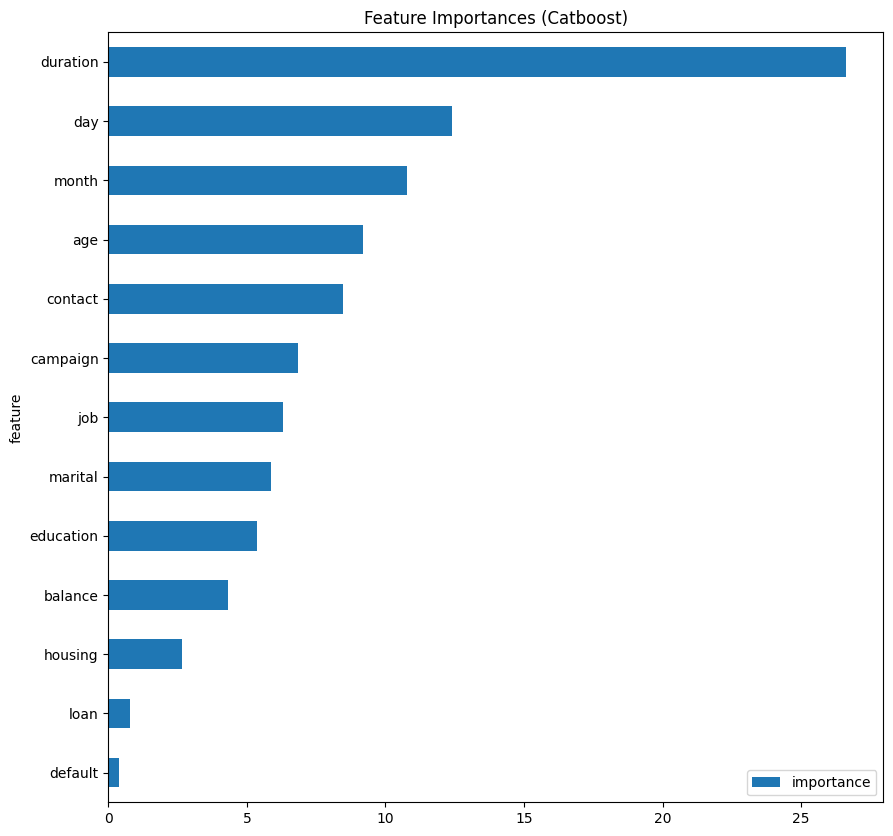

In [34]:
importances = cat_model.feature_importances_
feature_df = pd.DataFrame({'feature':df_train.drop('y',1).columns, 'importance':importances})

feature_df.sort_values('importance').plot.barh(y='importance', x='feature', figsize=(10,10))
plt.title('Feature Importances (Catboost)')

print(feature_df.sort_values('importance', ascending=False))

The CatBoostClassifier excels in accuracy and macro-average F1 score, even in the face of imbalanced data. Shared important features between CatBoost and Random Forest models indicate consistent factors in predicting customer subscriptions.

# **Customer Segmentation**

In [35]:
temp = df.drop('y',axis =1).copy()
y_temp = df["y"]

#oversampling to balance the classes
ros = RandomOverSampler()
X_seg, y_seg = ros.fit_resample(temp,y_temp)

data = pd.get_dummies(X_seg)

std_scaler = StandardScaler()
data_scaled = std_scaler.fit_transform(data)

X_main = X_seg.copy()
X_main['y'] = y_seg

In [36]:
def custom_mode(series):
    return series.mode().iloc[0]


y_pred_proba = rf.predict_proba(data_scaled)[:,1]

bins = [0,.4,.7,1]
labels = ['low', 'medium', 'high']
X_main['segment'] = pd.cut(y_pred_proba, bins=bins, labels=labels)
X_main['prediction_score'] = y_pred_proba
X_filtered = X_main[X_main['y'] == 1]
result = X_filtered.groupby('segment').agg({'age': 'mean', 'balance': 'median', 'duration': 'mean', 'day': 'median', 'campaign': 'median', 'month': custom_mode, 'job': custom_mode, "housing":custom_mode})
result['customer_count'] = X_filtered.groupby('segment').size()

print(result)

               age  balance     duration   day  campaign month         job  \
segment                                                                      
low      39.298098    533.0   567.213369  16.0       2.0   may  management   
medium   40.365827    732.0   794.428664  15.0       2.0   apr  management   
high     41.219213    990.0  1154.431017  17.0       2.0   apr  management   

         housing  customer_count  
segment                           
low            1           22979  
medium         0            9294  
high           0            3914  


In [37]:
fig = px.scatter(
    data_frame=X_filtered,
    x="balance",
    y="month",
    color="segment",
    size="duration",
    title="Visualizing Segement Result Using 2D Scatter Plot",
    labels={"balance": "Balance","month": "Month","duration": "Duration"},
    hover_name="segment" )

fig.update_layout(legend_title="Segment")
fig.show()


**Q) We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.**

# Overall Segment Properties

1.   Customers are grouped into three segments based on predicted probability scores: low, medium, and high.
2.   The low segment comprises approximately 70% of the customers, the medium segment includes around 28%, and the high segment contains roughly 10%.
3. The high and medium segments stand out as the most valuable customer groups with a higher likelihood of subscribing to term deposits.

# Low Segment

1. The low segment exhibits the lowest predicted subscription likelihood.
2. Customers in this segment tend to have shorter last contact durations, averaging around 574 seconds.
3. They maintain lower average yearly account balances, approximately 518 euros.
4. Typically, customers in this segment are middle-aged, with an average age of 39 years.
5. A significant portion of customers in this segment has existing housing loans.

# Medium Segment

1. The medium segment represents a moderate predicted subscription likelihood.
2. Customers in this group engage in medium-length last contact durations, averaging around 809 seconds
3. They maintain moderate yearly account balances, averaging about 754 euros.
4. The average age of customers in this segment is around 40 years.
5. Most customers in this segment do not have housing loans.

# High Segment

1. The high segment stands out with the highest predicted subscription likelihood.
2. Customers in this group have longer last contact durations, averaging approximately 1,205 seconds.
3. They maintain higher yearly account balances, with an average of 990 euros.
5. The average age of customers in this segment is around 41 years.
6. Unlike the low segment, most customers in this segment do not have housing loans.

# **Prioritizing Customers**

The high and medium segments, comprising middle-aged, high-net-worth customers without housing loans, should be the primary target for marketing term deposits. These customer segments are more likely to subscribe and are willing to spend a considerable amount of time during contact, which is a key indicator of their likelihood to subscribe. Thus, prioritizing marketing efforts towards these segments, limiting campaigns to no more than two, and scheduling campaigns around the middle of the month during the first quarter of the year can be an effective strategy. This targeted approach aims to maximize the likelihood of customer subscriptions to term deposits.